# Deep Fakes (1/3) - Preprocessing stage

This notebook is part of a group of notebooks that together belong to a Deep Fakes article. I try to teach all of you how to build Autoencoders for Deep Fakes from scratch.

In this particular notebook, I'll go across several steps to preprocess the required data to train the autoencoders: Extract frames from videos, extract faces from them and zip the final results in case you want to continue this project locally; otherwise, just use this notebook's output as the input of [the next one](https://www.kaggle.com/sergiovirahonda/deepfakes-model-training) where will be trained the Autoencoders required to produce deep fakes.

Regarding the data used, I've obtained videos with Creative Commons Attribution Licenses and therefore reuseing them is totally allowed.

# Imports

In [1]:
import cv2
import numpy as np
from numpy import expand_dims
import pandas as pd
import os
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/presidentsdataset/presidents/trump2.mp4
/kaggle/input/presidentsdataset/presidents/biden2.mp4
/kaggle/input/presidentsdataset/presidents/trump1.mp4
/kaggle/input/presidentsdataset/presidents/biden1.mp4
/kaggle/input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat


# Directories creation

In [2]:
!cd /kaggle/working/
!mkdir frames_1
!mkdir frames_2
!mkdir frames_3
!mkdir frames_4
!mkdir results_1
!mkdir results_2
!ls /kaggle/working/

__notebook__.ipynb  frames_2  frames_4	 results_2
frames_1	    frames_3  results_1


# Frames extraction

In [3]:
input_1 = '/kaggle/input/presidentsdataset/presidents/trump1.mp4'
input_2 = '/kaggle/input/presidentsdataset/presidents/trump2.mp4'
input_3 = '/kaggle/input/presidentsdataset/presidents/biden1.mp4'
input_4 = '/kaggle/input/presidentsdataset/presidents/biden2.mp4'
output_1 = '/kaggle/working/frames_1/'
output_2 = '/kaggle/working/frames_2/'
output_3 = '/kaggle/working/frames_3/'
output_4 = '/kaggle/working/frames_4/'

def extract_frames(input_path,output_path):
    videocapture = cv2.VideoCapture(input_path)
    success,image = videocapture.read()
    count = 0
    while success:
        cv2.imwrite(output_path+"frame%d.jpg" % count, image)     
        success,image = videocapture.read()
        count += 1
    return count

total_frames_1 = extract_frames(input_1,output_1)
total_frames_2 = extract_frames(input_2,output_2)
total_frames_3 = extract_frames(input_3,output_3)
total_frames_4 = extract_frames(input_4,output_4)

In [4]:
print('Total frames extracted in video 1: ',total_frames_1)
print('Total frames extracted in video 2: ',total_frames_2)
print('Total frames extracted in video 3: ',total_frames_3)
print('Total frames extracted in video 4: ',total_frames_4)

Total frames extracted in video 1:  1701
Total frames extracted in video 2:  1875
Total frames extracted in video 3:  1109
Total frames extracted in video 4:  1530


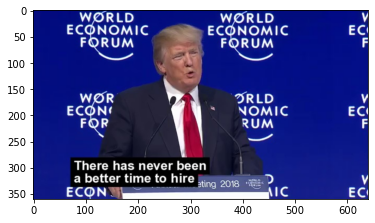

In [5]:
%matplotlib inline
plt.figure()
image = cv2.imread('/kaggle/working/frames_1/frame1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype('float32')
image /= 255.0
plt.imshow(image)
plt.show()

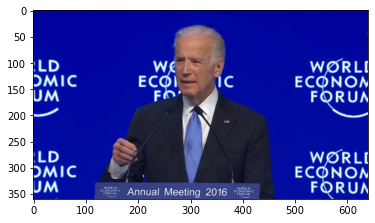

In [6]:
%matplotlib inline
plt.figure()
image = cv2.imread('/kaggle/working/frames_3/frame1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Faces' detection and extraction

In [7]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 1.2 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


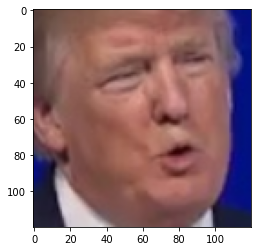

In [8]:
from mtcnn import MTCNN
import cv2
 
detector = MTCNN()
image = cv2.imread('/kaggle/working/frames_1/frame1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detections = detector.detect_faces(image)
x, y, width, height = detections[0]['box']
x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
face = image[y1:y2, x1:x2]
#face = cv2.resize(face, (170, 170), interpolation=cv2.INTER_AREA) #if shape is > 120x120
face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
plt.imshow(face)
plt.show()

In [9]:
detections

[{'box': [250, 51, 71, 90],
  'confidence': 0.9999406337738037,
  'keypoints': {'left_eye': (279, 87),
   'right_eye': (307, 82),
   'nose': (300, 102),
   'mouth_left': (291, 122),
   'mouth_right': (309, 119)}}]

In [10]:
def extract_faces(source_1,source_2,destination,detector):
    counter = 0
    for dirname, _, filenames in os.walk(source_1):
        for filename in filenames:
            try:
                image = cv2.imread(os.path.join(dirname, filename))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                detections = detector.detect_faces(image)
                x, y, width, height = detections[0]['box']
                x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
                face = image[y1:y2, x1:x2]
                face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                plt.imsave(os.path.join(destination,str(counter)+'.jpg'),face)
                print('Saved: ',os.path.join(destination,str(counter)+'.jpg'))
            except:
                pass
            counter += 1
    for dirname, _, filenames in os.walk(source_2):
        for filename in filenames:
            try:
                image = cv2.imread(os.path.join(dirname, filename))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                detections = detector.detect_faces(image)
                x, y, width, height = detections[0]['box']
                x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
                face = image[y1:y2, x1:x2]
                face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                plt.imsave(os.path.join(destination,str(counter)+'.jpg'),face)
                print('Saved: ',os.path.join(destination,str(counter)+'.jpg'))
            except:
                pass
            counter += 1

In [11]:
detector = MTCNN()
extract_faces('/kaggle/working/frames_1/','/kaggle/working/frames_2/', '/kaggle/working/results_1/',detector)
extract_faces('/kaggle/working/frames_3/','/kaggle/working/frames_4/', '/kaggle/working/results_2/',detector)

Saved:  /kaggle/working/results_1/0.jpg
Saved:  /kaggle/working/results_1/1.jpg
Saved:  /kaggle/working/results_1/2.jpg
Saved:  /kaggle/working/results_1/3.jpg
Saved:  /kaggle/working/results_1/4.jpg
Saved:  /kaggle/working/results_1/5.jpg
Saved:  /kaggle/working/results_1/6.jpg
Saved:  /kaggle/working/results_1/7.jpg
Saved:  /kaggle/working/results_1/8.jpg
Saved:  /kaggle/working/results_1/9.jpg
Saved:  /kaggle/working/results_1/10.jpg
Saved:  /kaggle/working/results_1/11.jpg
Saved:  /kaggle/working/results_1/12.jpg
Saved:  /kaggle/working/results_1/13.jpg
Saved:  /kaggle/working/results_1/14.jpg
Saved:  /kaggle/working/results_1/15.jpg
Saved:  /kaggle/working/results_1/16.jpg
Saved:  /kaggle/working/results_1/17.jpg
Saved:  /kaggle/working/results_1/18.jpg
Saved:  /kaggle/working/results_1/19.jpg
Saved:  /kaggle/working/results_1/20.jpg
Saved:  /kaggle/working/results_1/21.jpg
Saved:  /kaggle/working/results_1/22.jpg
Saved:  /kaggle/working/results_1/23.jpg
Saved:  /kaggle/working/re

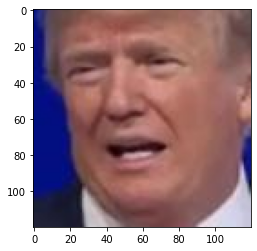

In [12]:
%matplotlib inline
plt.figure()
image = cv2.imread('/kaggle/working/results_1/700.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Zipping final results

In [13]:
!zip -r /kaggle/working/trump_faces.zip /kaggle/working/results_1/
!zip -r /kaggle/working/biden_faces.zip /kaggle/working/results_2/

  adding: kaggle/working/results_1/ (stored 0%)
  adding: kaggle/working/results_1/3520.jpg (deflated 5%)
  adding: kaggle/working/results_1/2120.jpg (deflated 5%)
  adding: kaggle/working/results_1/2457.jpg (deflated 5%)
  adding: kaggle/working/results_1/38.jpg (deflated 6%)
  adding: kaggle/working/results_1/3240.jpg (deflated 5%)
  adding: kaggle/working/results_1/985.jpg (deflated 5%)
  adding: kaggle/working/results_1/305.jpg (deflated 5%)
  adding: kaggle/working/results_1/1759.jpg (deflated 5%)
  adding: kaggle/working/results_1/1266.jpg (deflated 5%)
  adding: kaggle/working/results_1/2173.jpg (deflated 5%)
  adding: kaggle/working/results_1/86.jpg (deflated 5%)
  adding: kaggle/working/results_1/646.jpg (deflated 5%)
  adding: kaggle/working/results_1/1472.jpg (deflated 5%)
  adding: kaggle/working/results_1/3494.jpg (deflated 5%)
  adding: kaggle/working/results_1/764.jpg (deflated 5%)
  adding: kaggle/working/results_1/309.jpg (deflated 5%)
  adding: kaggle/working/results_